## Decision Tree Models
| Learning Technique | Type of Learner | Type of Learning | Classification | Regression | Clustering | Outlier Detection 
| --- | --- | --- | --- | --- | --- | --- |
| *Decision Trees* | *Non-parametric Model* | *Supervised Learning*| *Supported* | *Supported* | *Not-Supported* | *Not-Supported* |

Decision Trees, for short DTs, are a *non-parametric supervised learning method* used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

Their mathematical formulation is generally provided as follows: Given training vectors $x_{i} \in R^{n}$, $i=1,…, l$ and a label vector $y \in R^{l}$, a decision tree recursively partitions the space such that the samples with the same labels are grouped together.

Let the data at node $m$ be represented by $Q$. For each candidate split $\theta = (j, t_{m})$
consisting of a feature $j$ and threshold $t_{m}$, partition the data into $Q_{left}(\theta)$ and $Q_{right}(\theta)$ subsets as:

\begin{align}\begin{aligned}Q_{left}(\theta) = {(x, y) | x_j <= t_m}\\Q_{right}(\theta) = Q \setminus Q_{left}(\theta)\end{aligned}\end{align}

The impurity at $m$ is computed using an impurity function $H()$, the choice of which depends on the task being solved (classification or regression) like:

\begin{align}
G(Q, \theta) = \frac{n_{left}}{N_m} H(Q_{left}(\theta)) + \frac{n_{right}}{N_m} H(Q_{right}(\theta))
\end{align}

Select the parameters that minimises the impurity: $\theta^* = \operatorname{argmin}_\theta  G(Q, \theta)$.

Recurse for subsets $Q_{left}(\theta^*)$ and $Q_{right}(\theta^*)$ until the maximum allowable depth is reached,
$N_m < \min_{samples}$ or N_m = 1.

Speaking about *Classification Criteria* referred to the procedure used for learining or fit to the data a decision tree we can state what follows: If a target is a classification outcome taking on values $0,1,…,K-1$, for node $m$, representing a region $R_{m}$ with $N_{m}$ observations, let $p_{mk} = 1/ N_m \sum_{x_i \in R_m} I(y_i = k)$ be the proportion of class $k$ observations in node $m$.

So, Common measures of impurity are:
- Gini, specified as $H(X_m) = \sum_k p_{mk} (1 - p_{mk})$, which is a measure of statistical dispersion intended for  measuring the degree of inequality in a distribution. Useful features of the Gini coefficient include:
    - __Anonymity__: it does not matter who the high and low values of a given attributes are.
    - __Scale independence__: the Gini coefficient does not consider the size of variable taken into account.
    - __Population independence__: it does not matter how large the population investigated.
    - Some __bacwards__ instead are , as an instance, that such a index does not take into account the *strucutural improvements, changes* that may happen when looking at a given population that it's known to evlove by the time.

<img src="images/Economics_Gini_coefficient2.svg.png" alt="Gini Index Graphics" style="width: 400px;"/>

- Entropy, definead as $(X_m) = - \sum_k p_{mk} \log(p_{mk})$, which is a basic quantity in information theory associated to any random variable, which can be interpreted as the *average level of "information", "surprise", or "uncertainty"* inherent in the variable's possible outcomes. To understand the meaning of $(X_m) = - \sum_k p_{mk} \log(p_{mk})$, first define an information function *I* in terms of an event i with probability $p_{i}$. The amount of information acquired due to the observation of event i follows from Shannon's solution of the fundamental properties of information:
    - $I(p)$ is monotonically decreasing in p : an increase in the probability of an event decreases the information from an observed event, and vice versa.
    - $I(p) ≥ 0$ : information is a non-negative quantity.
    - $I(1) = 0$ : events that always occur do not communicate information.
<img src="images/Binary_entropy_plot.svg.png" alt="Gini Index Graphics" style="width: 400px;"/>
where, we recall that $X_{m}$ is the training data in node  $m$.

In [1]:
from utils.all_imports import *;
%matplotlib inline

None


In [2]:
# Set seed for notebook repeatability
np.random.seed(0)

# READ INPUT DATASET
# --------------------------------------------------------------------------- #
dataset_path, dataset_name, column_names, TARGET_COL = get_dataset_location()
estimators_list, estimators_names = get_estimators()

dataset, feature_vs_values = load_brdiges_dataset(dataset_path, dataset_name)

In [3]:
columns_2_avoid = ['ERECTED', 'LENGTH', 'LOCATION']

In [4]:
# Make distinction between Target Variable and Predictors
# --------------------------------------------------------------------------- #
rescaledX, y, columns = prepare_data_for_train(dataset, target_col=TARGET_COL)

Summary about Target Variable {target_col}
--------------------------------------------------
2    57
1    13
Name: T-OR-D, dtype: int64
shape features matrix X, after normalizing:  (70, 11)


In [5]:
# Parameters to be tested for Cross-Validation Approach
# -----------------------------------------------------
# Array used for storing graphs
plots_names = list(map(lambda xi: f"{xi}_learning_curve.png", estimators_names))
pca_kernels_list = ['linear', 'poly', 'rbf', 'cosine', 'sigmoid']
cv_list = list(range(10, 1, -1))
param_grids = []
parmas_tree = {
    'splitter': ('random', 'best'),
    'criterion':('gini', 'entropy'),
    'max_features': (None, 'sqrt', 'log2'),
    'max_depth': (None, 3, 5, 7, 10,),
    'splitter': ('best', 'random',),
    'class_weight': (None, 'balanced'),
}; param_grids.append(parmas_tree)
# Some variables to perform different tasks
# -----------------------------------------------------
N_CV, N_KERNEL, N_GS = 9, 5, 6;
nrows = N_KERNEL // 2 if N_KERNEL % 2 == 0 else N_KERNEL // 2 + 1;
ncols = 2; grid_size = [nrows, ncols]

In [6]:
n_components=9
learning_curves_by_kernels(
# learning_curves_by_components(
    estimators_list[:], estimators_names[:],
    rescaledX, y,
    train_sizes=np.linspace(.1, 1.0, 10),
    n_components=9,
    pca_kernels_list=pca_kernels_list[0],
    verbose=0,
    by_pairs=True,
    savefigs=True,
    scoring='accuracy',
    figs_dest=os.path.join('figures', 'learning_curve', f"Pcs_{n_components}"), ignore_func=True,
    # figsize=(20,5)
)

In [7]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

Kernel PCA: Linear | Tree
              precision    recall  f1-score   support

     class 0       0.30      0.50      0.37         6
     class 1       0.88      0.75      0.81        28

    accuracy                           0.71        34
   macro avg       0.59      0.62      0.59        34
weighted avg       0.77      0.71      0.73        34

Best Score (CV-Train) Best Score (Test)   AUC  P-value
                 0.84              0.71  0.62  0.15842


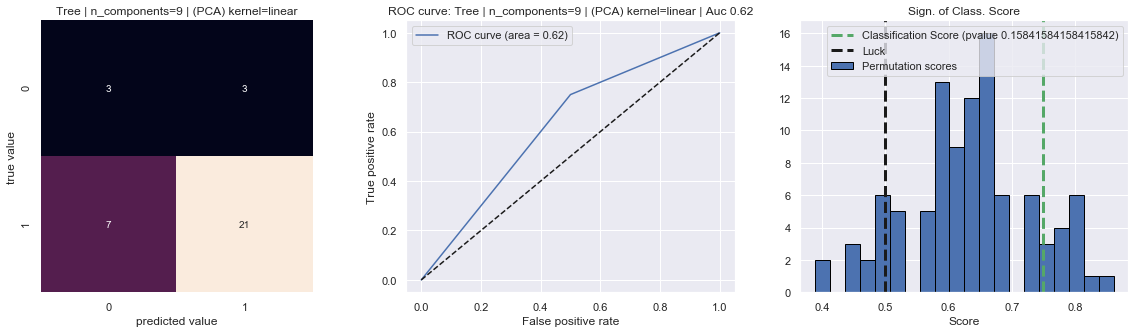

Kernel PCA: Poly | Tree
              precision    recall  f1-score   support

     class 0       0.21      0.83      0.33         6
     class 1       0.90      0.32      0.47        28

    accuracy                           0.41        34
   macro avg       0.55      0.58      0.40        34
weighted avg       0.78      0.41      0.45        34

Best Score (CV-Train) Best Score (Test)   AUC  P-value
                 0.92              0.41  0.58  0.80198


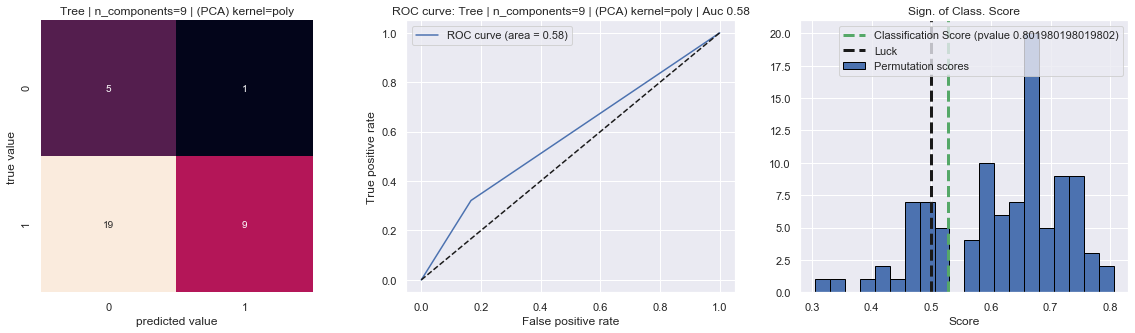

Kernel PCA: Rbf | Tree
              precision    recall  f1-score   support

     class 0       0.11      0.17      0.13         6
     class 1       0.80      0.71      0.75        28

    accuracy                           0.62        34
   macro avg       0.46      0.44      0.44        34
weighted avg       0.68      0.62      0.65        34

Best Score (CV-Train) Best Score (Test)   AUC  P-value
                 0.91              0.62  0.44  0.02970


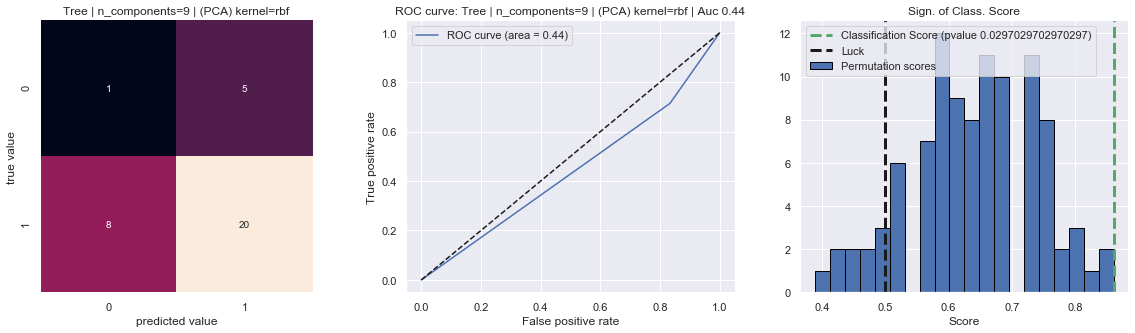

Kernel PCA: Cosine | Tree
              precision    recall  f1-score   support

     class 0       0.00      0.00      0.00         6
     class 1       0.81      0.89      0.85        28

    accuracy                           0.74        34
   macro avg       0.40      0.45      0.42        34
weighted avg       0.66      0.74      0.70        34

Best Score (CV-Train) Best Score (Test)   AUC  P-value
                 0.86              0.74  0.45  0.04950


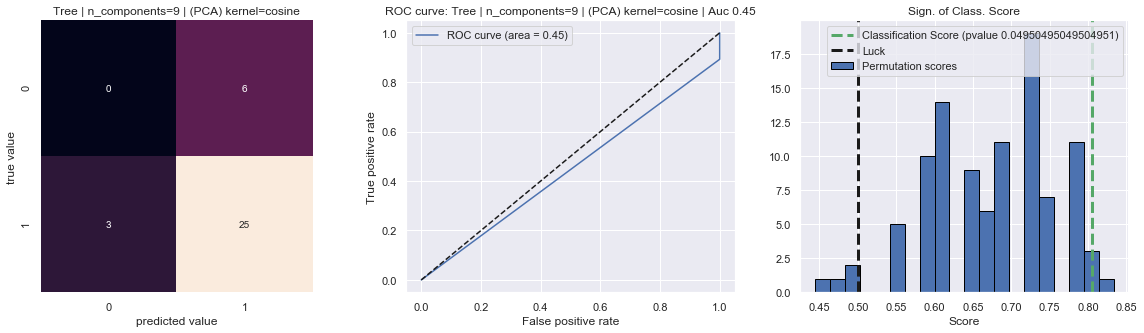

Kernel PCA: Sigmoid | Tree
              precision    recall  f1-score   support

     class 0       0.20      0.17      0.18         6
     class 1       0.83      0.86      0.84        28

    accuracy                           0.74        34
   macro avg       0.51      0.51      0.51        34
weighted avg       0.72      0.74      0.73        34

Best Score (CV-Train) Best Score (Test)   AUC  P-value
                 0.81              0.74  0.51  0.22772


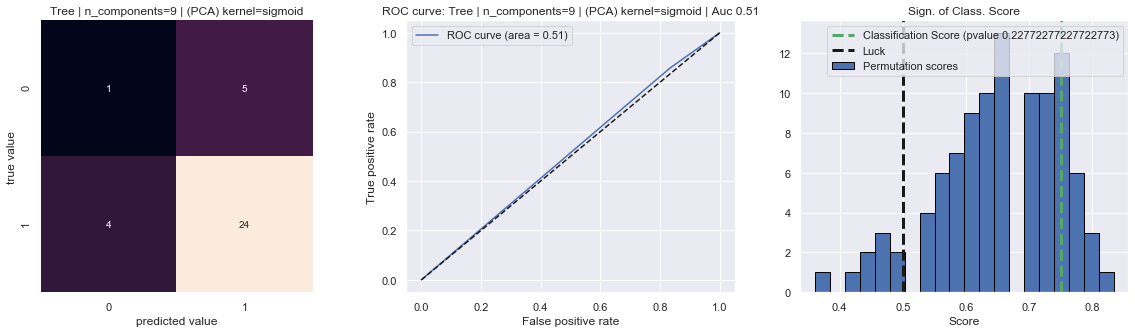

In [8]:
plot_dest = os.path.join("figures", "n_comp_9_analysis", "grid_search")
X = rescaledX

df_gs, df_auc_gs, df_pvalue = grid_search_all_by_n_components(
    estimators_list=estimators_list[5], \
    param_grids=param_grids[0],
    estimators_names=estimators_names[5], \
    X=X, y=y,
    n_components=9,
    random_state=0, show_plots=False, show_errors=False, verbose=1, plot_dest=plot_dest, debug_var=False)
df_9, df_9_auc = df_gs, df_auc_gs

Looking at the results obtained running grid-search algorithm applied to Decision Tree Classifier we can rougly saying that the different models will obtain performances with default classification thresholds that are not as good as the results obtained from previous models, also because the models do not show Roc Curve along with their corresponding Auc scores that enable us saying that such models can perform well during inference also varying the default threshold. In particular we can say what follows:

1. Looking at __Linear kernel-Pca based Decision Tree Classifier__, we notice that with the default threshold the model obtain high precision and recall for class 1 examples, meaning it is able to correctly classify most of the samples from class 1 as well as few examples from class 0 are exchanged as belonging to class 1. However speaking about class 0 we notice that we have obtained a very low precision and a 50 percent of recall that means that the model with default threshold misclassifyes half of the samples from class 0 and we are not really sure that what we have classified as the class 0 instance it really belong to class 0. Finally looking at Roc Curve  we can observe that even from the very beginning the Sensitivity and 1-Specificity grow linearly with a slope value sligthly bigger than the slope of referring curve represented by Random Classifier, however at a given point the slope changes and as the thresholds approaches to higher values and the curve approaches to the top the slope decreases importantly, instead the value of Auc score account for 0.62.


2. While looking at __Poly kernel-Pca based Decision Tree Model__, we can clearly understand that such a classifier is not good enough to be exploited for further inferences since it accounts for just .58 value of Auc score and observing Roc Curve we can conclude that it goes slightly better than the curve provided by random classifier. Moreover, the model when we adopt the default threshold seems to correctly classify most of the istances from class 0, but wrongly predict the class for instances of the opposite categories, in fact it is characterized from law precision referred to class 0, and since we want to correctly predict labels for both categories, here with such a classifier we are not able to satisfy such a constraint.


3. The classifier corresponding to a __Rbf kernel-Pca based Decision Tree__, here is the model which leads to the worst performances, since the roc curve graphics is even worst than the random classifier and the roc curve accounts for a Auc score that is less than .5, more precisely just .44. So this result will be discarded, even if the model seems to correctly recognize samples from class 1 but wrongly predict labels for the class 0 samples, and again also here we have to state that we are not able to meet the constraint of correctly classify most of the data examples as we expect from a well defined classifier.


4. Referring to __Cosine kernel-Pca based Decision Tree Classifier__, when adopting a default threshold we notice that the model even if correctly classifyes all samples from class 0 leading to high recall for such a category, we can say also that the model has a low precision for class 0, meaning that the model confuses many samples from class 1 in fact is characterized from low value of recalll for the class 1, however when predicts a label equals to category one it is almost always sure about the choice. Thus, looking at Roc Curve and Auc score we can note that the model is characterized from a firt phase in which the Sensitivityu and 1-Specificity are not growing linearly following a line with a slope even lower than the one of Random Classifier as the preivous models, accounting for a AUC score equals to *45%*, we cannot neither decided to switch the labels for trying to train another classifier with such a new configuration, since the AUC does not suggest us to follow this new available and well-knwon strategy.


5. Lastly the __Sigmoid kernel-Pca based Decision Tree Classifier__, with a default threshold of .5 for classification shows peformance scores that are more or less analog to those seen previously for *Rbf and Cosine kernel-Pca based Decision Tree Models*. The only difference is that the model get a AUC score much closer to that of Random Classifier. Again, also this model is able to predict with high recall the samples belonging to class 1, instead wrongly predict class labels for those samples whcih come from class 0.

__Significance Analysis__: finally, when looking at the different graphics related to the test which aims at investigating the diagnostic power of our different models we have fine tuned for *SGD Classifier*, picking the best one for such a test we can notice that beacues of the *signficance level* $\alpha$ set equal to *0.05 that is 5% of chance to reject the Null-Hypothesis $H_{0}$*, we have obtained following results. Adopting the Decision Trees statistical learning technique for classification fine tuned as above with hyper-params selectd also depending on the kind of *kernel-trick adopted for kernel-Pca unsupervised technique*, we can claim that only two out of five trials lead to a *p-vlaue* worst than *selected significance level equal to 5%*, which are *Rbf- and Cosine-kernel Pca based Sgd Classifier*, so rejecting the *Null-Hypotesis* for those two cases will results into a *Type I Error*. While the remaining three cases, that are *Linear Poly-, and Sigmoid-kernel Pca based Sgd Classifier* have obtained a p-value over the range $[15, 90] \in R$ *in percet points*. Holthough we have at least two out of five classifier fine tuned that seem to allow us reject the *Null-Hypothesis* in order  to justify the usae of such a models so fine-tuned and that accept the weights and hyper-parameters values we have discovered we end up saying that there is no one of the previous models that for sure we will accept to employ for inference and classification tasks due to their worst performance, rougly speaking. In other words, it seems that *Decision Tree Classification technique* does not work fine with such a small, unbalanced dataset.

#### Table Fine Tuned Hyper-Params(Decision Trees Classifier)

In [9]:
# create_widget_list_df([df_gs, df_auc_gs]) #print(df_gs); print(df_auc_gs)
show_table_summary_grid_search(df_gs, df_auc_gs, df_pvalue)

,AUC(%),P-Value(%),Acc Train(%),Acc Test(%),class_weight,criterion,max_depth,max_features,splitter
Tree linear,0.62,15.84,0.84,0.71,None,gini,None,None,best
Tree poly,0.58,80.20,0.92,0.41,None,entropy,None,None,best
Tree rbf,0.44,2.97,0.91,0.62,balanced,gini,None,sqrt,best
Tree cosine,0.45,4.95,0.86,0.74,None,entropy,3,None,random
Tree sigmoid,0.51,22.77,0.81,0.74,balanced,gini,None,None,best


### Decision Trees Classifiers References
- (Non-Parametric Learning: Decsion Trees) https://scikit-learn.org/stable/modules/tree.html#tree

Looking at the table shown above and obtained running grid-search algorithm applied to Decision Tree Classifier, only three out of five classifier get significant accuracy values, and those are Decision Tree created by means of *Linear, Cosine Sigmoid tricks adopted for kernel-Pca*, since we reaches accuracy up to *71%, 74%, and 74%* respectively. However, the worst classifier reveals to be *Polynomial based kernel Pca Decision Tree* with an accuracy on test set that reaches just *41%*, lastly the *Sigmoid based kernel Pca Decision Tree* was slightly worst than the previous three classifier that we have told were the best models, since the latter *Sigmoid based kernel Pca Decision Tree* has reached an accuracy score just 10 percent points less than the previous three, that is *62%*, however, not enough to consider it a good enough classifier. Looking at the hyper-parameters results shown from the summary table included in the report just above for DecisionTree Classification algorithm we can explain those results as follows:

- Referring to the **class_weight hyper-param**, which represents weights associated with classes and if we disable such a setting so that it is valued to None, all classes are supposed to have weight one. Instead the *“balanced”* mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)). We can notice that the choice of whether adopting a weighted strategy as balanced for performing training phase was chosen as best hyper-param value for *class_weight param* from just two out of five resulting fine tuned classifiers which were *Rbf, Sigmoid kernel-Pca based Decision Tree Classifier*, while the remaining adopted a uniform strategy. However discarding the worst classifier such a parameter half of the time was chose to be balanced and the remaining time to be uniform. In other words the choice of the kernel-trick at preprocessing time affected later the choice at grid-search training for *class_weight hyper-param*.


- Reviewing **criterion decision trees' param**, which stands for the function to measure the quality of a split, where supported criteria are *“gini” for the Gini impurity and “entropy” for the information gain*. The most chosen *measure the quality* was the *gini for the Gini impurity*, in fact *Linear, Rbf, Sigmoid kernel-Pca based Decision Tree Classifier* selected this technique, while the remaining fine tuned classifiers *Poly and Cosine kernel-Pca based Decision Tree Classifiers* take advantages from exploiting *“entropy” for the information gain*. Again the choice at pre-processing time of a specific kernel-trick amongst those available for kernel-Pca unsupervised procedure leads to a particular *criterion* adopted from the trees based estimator when building the trees strucuture.


- Looking at **max_depth trees' param**, which stands for the maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than *min_samples_split samples*, we clearly understand that for such a unbalanced and small dataset the best strategy while building the trees data strucutre was to keep growing the trees until all leaves are pure or until all leaves contain less than *min_samples_split samples*. In other words the hyper-param was set with a None value suggesting not to stop growing the trees at a given point, but rather to expand as much as possible. Only for *Cosine kernel-Pca based Decision Tree Classifiers* the best max_depth value for the hyper-parameter involved in this analysis was set to a really small size, just three nodes, which means that the preprocessed data via Cosine kernel-trick, does need to* much attributes to be taken into account before arriving into a leaf node.


- Also describing **max_features hyper-parameter**, that is, the number of features to consider when looking for the best split, where if *“sqrt”, then max_features=sqrt(n_features)*, *if “log2”, then max_features=log2(n_features)*, and *if None, then max_features=n_features,* we can notice that the initial choice of the kernel-trick for pre-processing the data points within the dataset do not affect the final selection about the right technique to be adopted for calculating the number of features to be considered when looking for the best split. Moreover, since we are dealing with a small dataset, unbalanced with respect the class labels and also with a small number of features, we can reasonable understand that in most of the cases the classifier get better performance scores just considering a number of features equal to the available features after having performed the kernel-Pca algorithm. Only *Rbf kernel-Pca based Decision Tree Classifiers* selected a strategy tgat corresponds to *“sqrt”, then max_features=sqrt(n_features)* for deciding the features to be identifyed for the best split.


- Lastly, when speaking about the strategy used to choose the split at each node, where supported strategies are *“best” to choose the best split and “random” to choose the best random split*, we are saying that we are referring to **splitter hyper-parameter**. Here, for the trails we have carryed out, what we can say about such a hyper-param, is that since we are dealing with a small dataset, unbalanced and with not so much large number of features, also after having preprocessed it and discarded some useless features, is that the diverese fine tuned models in most of the cases adopted a best strategy, which requires more trainign time, while just for a single case corresponding to *Cosine kernel-Pca based Decision Tree Classifier*, the retrieved model seems to go better when adopint a random strategy.

The choice of kernel-Pca with a specific kernel-trick was decisive and affects the hyper-partameters set for building the If we imagine to build up an *Ensemble Classifier* from the family of *Average Methods*, which state that the underlying principle leading their creation requires to build separate and single classifiers than averaging their prediction in regression context or adopting a majority vote strategy for the classification context, we can claim that amongst the purposed decision trees classifier, for sure, we could employ the classifiers found from the __Linear, Rbf, Cosine and Sigmoid kernel-Pca based Decision Tree Classifier__ because of their performance metrics and also because Ensemble Methods such as Bagging Classifier, usually work fine exploiting an ensemble of independent and fine tuned classifier differently from Boosting Methods which instead are based on weak learners.

### Decision Trees Classifiers References
- (__Ensemble, Non-Parametric Learning: Decision Trees__) https://scikit-learn.org/stable/modules/tree.html#tree
- (__Gini Index__) https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- (__Entropy__) https://en.wikipedia.org/wiki/Entropy_(information_theory)